**Task 8: Clustering with K-Means**

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.

In [6]:
# Step 4: Drop non-numeric or irrelevant columns (e.g., 'CustomerID', 'Gender')
df_numeric = df.drop(['CustomerID', 'Gender'], axis=1)

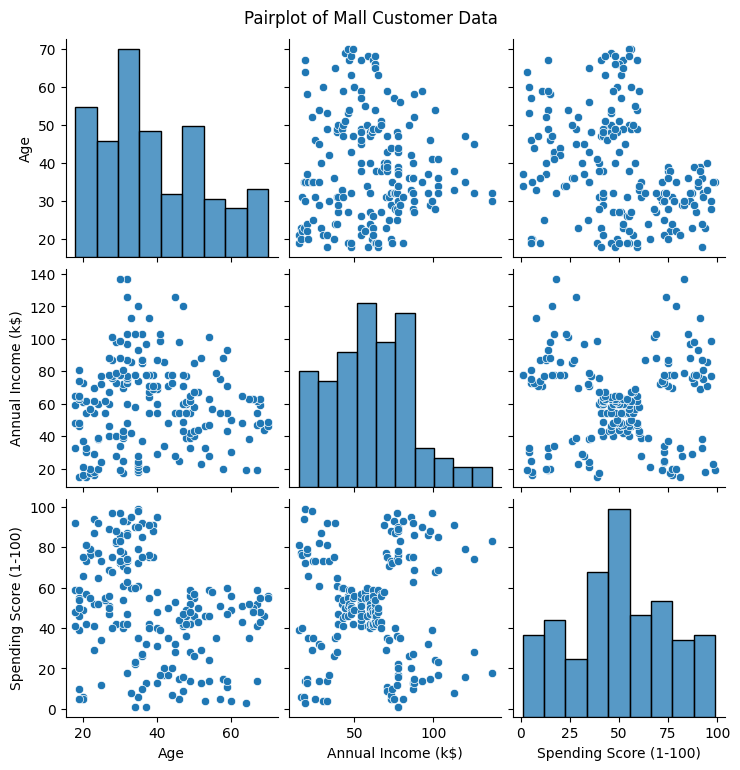

In [7]:
# Step 5: Pairplot to visualize relationships
sns.pairplot(df_numeric)
plt.suptitle("Pairplot of Mall Customer Data", y=1.02)
plt.show()

In [9]:
# Step 6: PCA for 2D Visualization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

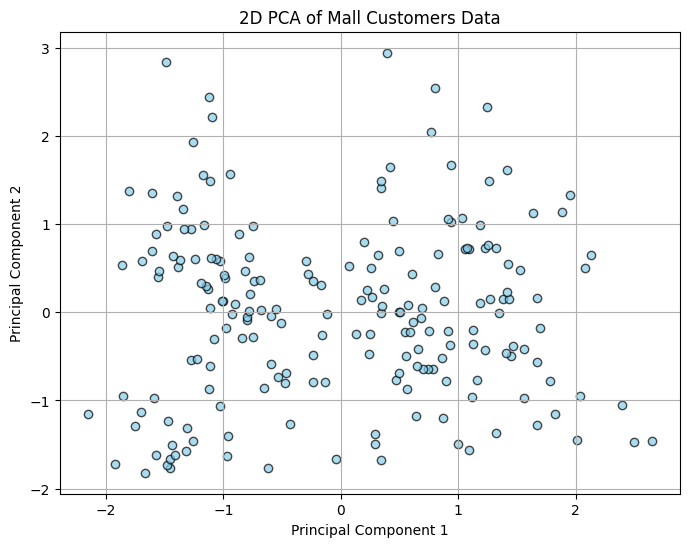

In [10]:
# Step 7: Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='skyblue', edgecolor='k', alpha=0.7)
plt.title("2D PCA of Mall Customers Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Try with 5 clusters
cluster_labels = kmeans.fit_predict(df_scaled)

In [13]:
df['Cluster'] = cluster_labels


In [14]:
print("\nCluster assignment done. Here's a preview:")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


Cluster assignment done. Here's a preview:
   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        3
3   23                  16                      77        2
4   31                  17                      40        2


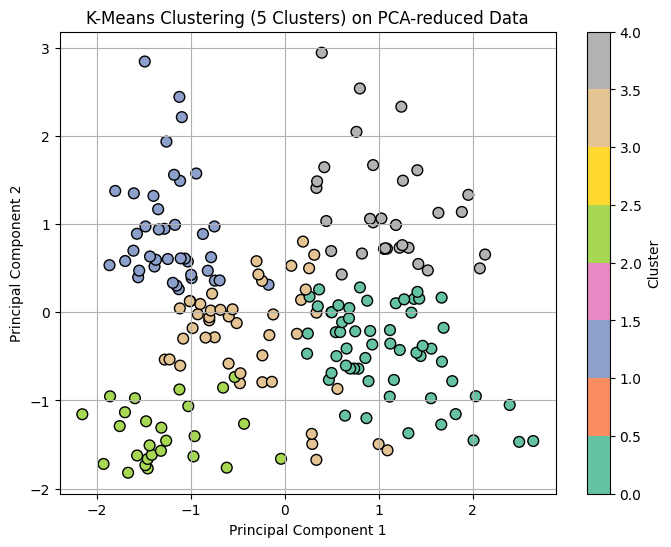

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='Set2', s=60, edgecolor='k')
plt.title("K-Means Clustering (5 Clusters) on PCA-reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

**3.Use the Elbow Method to find optimal K**

In [16]:
# Step 1: Compute WCSS for different values of K
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

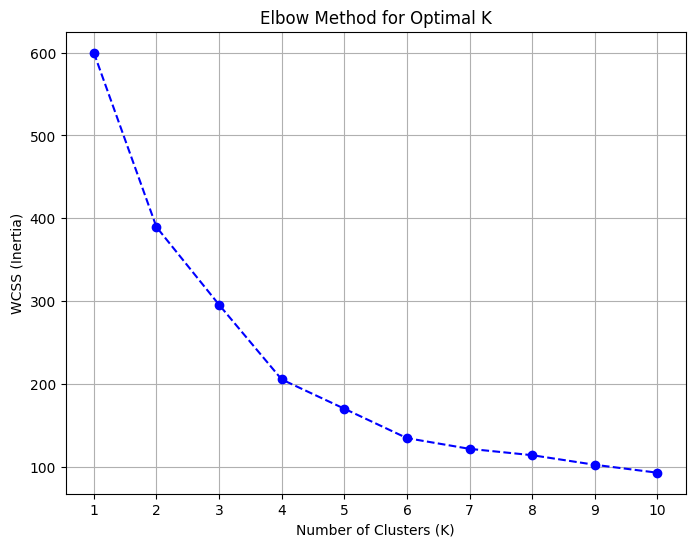

In [17]:
# Step 2: Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='blue')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.xticks(K_range)
plt.grid(True)
plt.show()

**4.Visualize clusters with color-coding**

In [18]:
optimal_k = 5

In [19]:
# Step 2: Refit KMeans using optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(df_scaled)

In [20]:
# Step 3: Add new cluster labels to DataFrame
df['Cluster'] = cluster_labels



In [21]:
# Step 4: Project centroids to PCA space for plotting
centroids_scaled = kmeans_optimal.cluster_centers_
centroids_pca = PCA(n_components=2).fit_transform(centroids_scaled)

In [22]:
# Step 5: Scatter plot with color-coded clusters
plt.figure(figsize=(9, 7))
palette = sns.color_palette("Set2", optimal_k)

<Figure size 900x700 with 0 Axes>

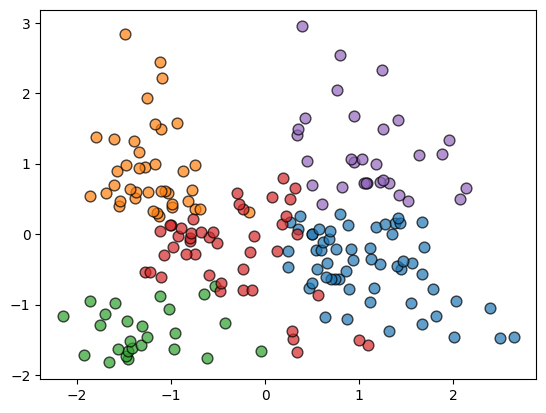

In [23]:
# Plot each cluster
for i in range(optimal_k):
    plt.scatter(
        pca_components[cluster_labels == i, 0],
        pca_components[cluster_labels == i, 1],
        label=f'Cluster {i}',
        s=60,
        alpha=0.7,
        edgecolor='k'
    )

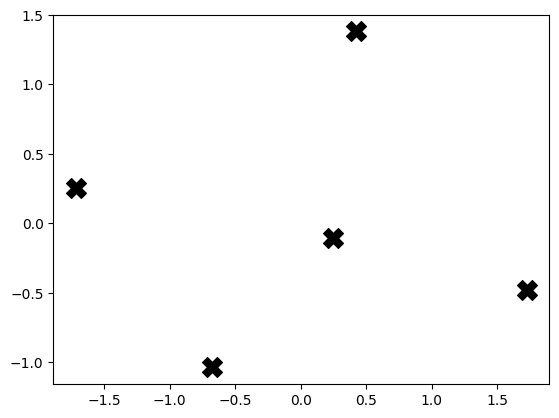

In [24]:
# Plot centroids
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    marker='X', s=200, c='black', label='Centroids'
)


/tmp/ipython-input-25-1198092907.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


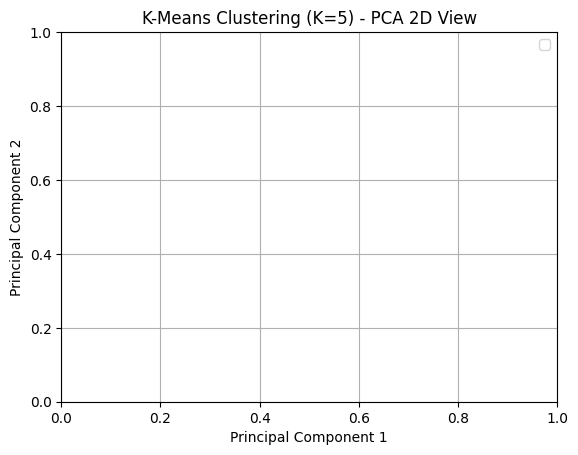

In [25]:
# Final plot settings
plt.title(f"K-Means Clustering (K={optimal_k}) - PCA 2D View")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

**5.Evaluate clustering using Silhouette Score.**

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
# Step 2: Calculate Silhouette Score for current cluster labels
score = silhouette_score(df_scaled, cluster_labels)

In [28]:
# Step 3: Print the result
print(f"\nSilhouette Score for K={optimal_k}: {score:.4f}")


Silhouette Score for K=5: 0.4085


In [29]:
# Step 4: Try silhouette scores for multiple K values
sil_scores = []
K_range = range(2, 11)  # Must be at least 2 clusters


In [30]:

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    sil_scores.append(score)

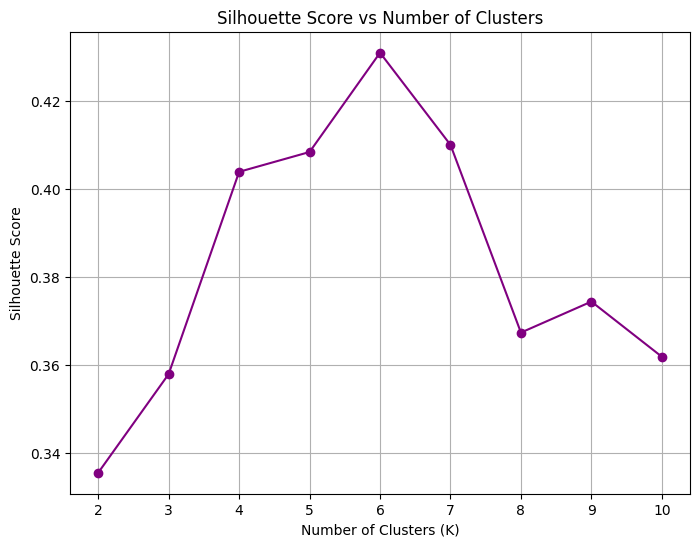

In [31]:
# Step 5: Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(K_range, sil_scores, marker='o', linestyle='-', color='purple')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range)
plt.grid(True)
plt.show()